<a href="https://colab.research.google.com/github/ApahSaroj/WQC/blob/main/WPI_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Krish Naik**

https://github.com/krishnaik06/Car-PricePrediction/blob/main/Car_Price.ipynb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.metrics import mean_squared_error,mean_absolute_error
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')

df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [4]:
df.dropna(inplace=True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630,Excellent
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996,Excellent
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811,Excellent
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970,Good


In [5]:
df.shape

(485, 16)

In [6]:
df.dtypes[df.dtypes == object]

WQC    object
dtype: object

In [7]:
df.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.808880,7.436784,115.889278,62.251546,196.757361,8.911093,43.756701,24.387629,3.042495,0.512101,14.180745,1.291492,14.829563,0.089608,0.293930
std,0.411552,1.106868,47.332843,20.104135,81.181745,5.730719,17.846411,10.829170,2.306840,0.495054,9.297846,1.840738,14.662305,0.156697,0.132472
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.550000,6.700000,84.000000,50.000000,140.000000,5.290000,32.000000,16.000000,1.770000,0.249000,8.600000,0.246000,5.544000,0.023700,0.222014
50%,7.860000,7.400000,102.000000,56.000000,171.100000,7.100000,40.000000,22.000000,2.420000,0.312000,11.000000,0.535982,9.570000,0.046253,0.254719
75%,8.100000,8.100000,129.000000,72.000000,220.000000,10.240000,52.000000,28.000000,3.400000,0.466000,16.400000,1.526654,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
 15  WQC         485 non-null    object 
dtypes: float64(15), object(1)
memory usage: 64.4+ KB


In [9]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'are:',df[col].unique())
    print('-'*75)

Unique items in column WQC are: ['Excellent' 'Good' 'moderately polluted water' 'highly polluted water']
---------------------------------------------------------------------------


In [10]:
for col in df[['WQC']]:
    print(df[col].value_counts())
    print('-'*75)

Excellent                    458
Good                          18
moderately polluted water      7
highly polluted water          2
Name: WQC, dtype: int64
---------------------------------------------------------------------------


In [11]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
WQC           0
dtype: int64

In [12]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,Excellent
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,Excellent
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,Excellent
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,Excellent
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,Excellent


In [13]:
def Encode(df,variable):
    encoded_Variable = df[variable].value_counts().to_dict()
    df[variable] = df[variable].map(encoded_Variable)

In [14]:
for col in df[['WQC']]:
    Encode(df,col)

In [15]:
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,458
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,458
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,458
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,458
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,458


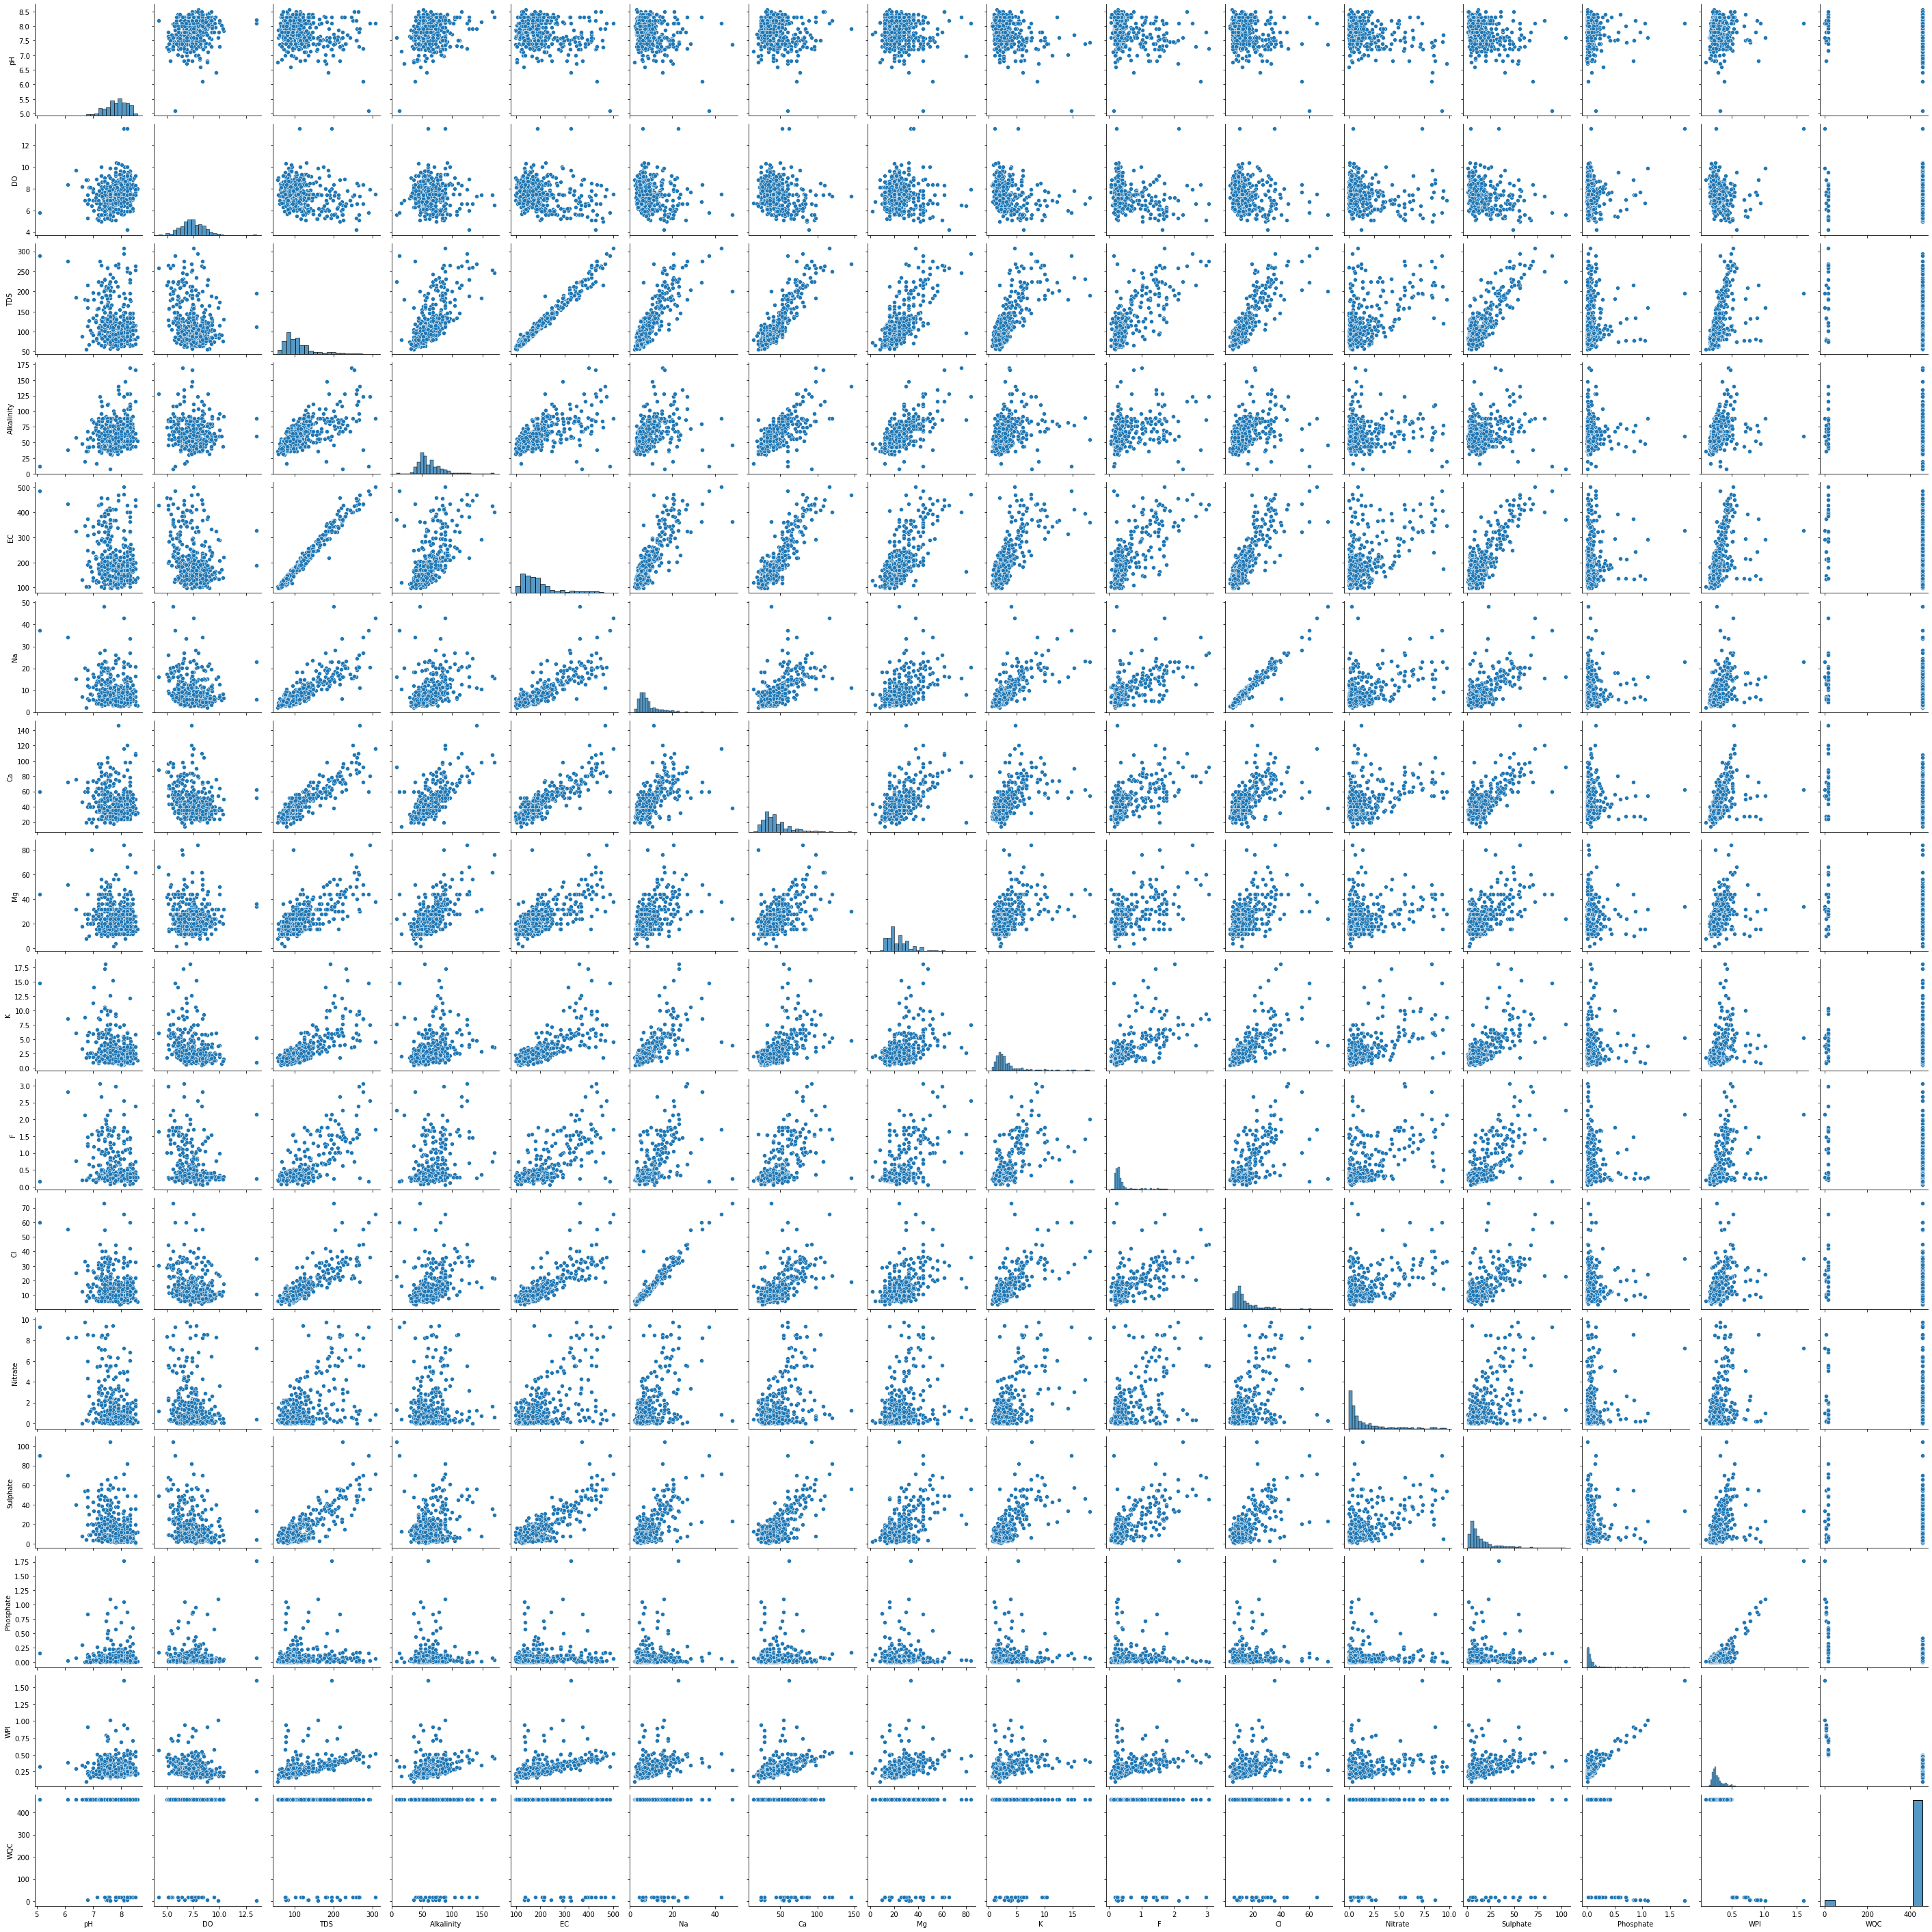

In [16]:
sns.pairplot(df)

In [17]:
df_corr = df.corr()
index = df_corr.index

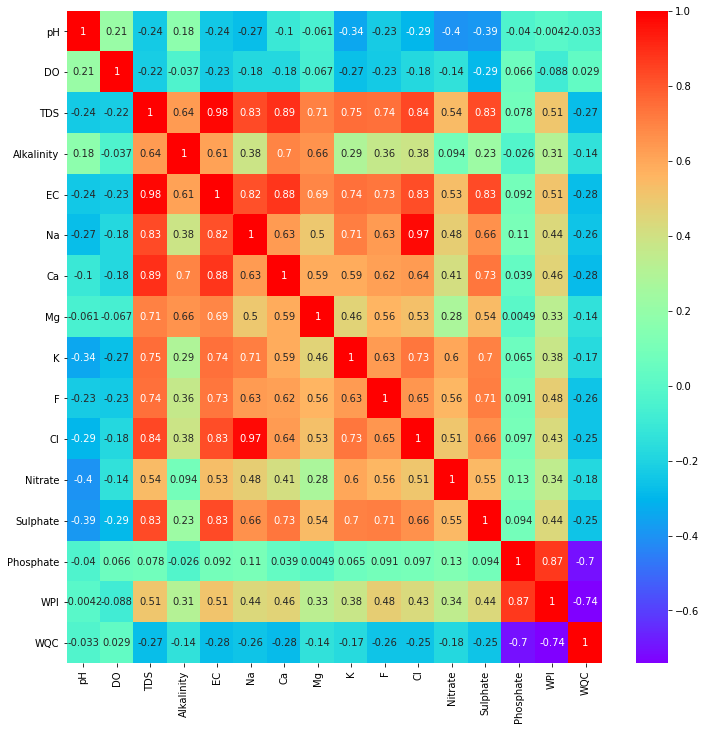

In [19]:
plt.figure(figsize = (12,12))
sns.heatmap(df[index].corr(),annot = True,cmap = 'rainbow')

In [20]:
X = df.drop(['WPI'],axis = 1)
y = df['WPI']

In [21]:
X.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WQC
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,458
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,458
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,458
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,458
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,458


In [22]:
y.head()

0    0.249528
1    0.216400
2    0.183814
3    0.219282
4    0.165831
Name: WPI, dtype: float64

In [29]:
threshold = 0.52

def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

correlation(X,threshold)

{'Alkalinity',
 'Ca',
 'Cl',
 'EC',
 'F',
 'K',
 'Mg',
 'Na',
 'Nitrate',
 'Sulphate',
 'WQC'}

In [30]:
model=ExtraTreesRegressor(random_state = 101)
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=101, verbose=0, warm_start=False)

In [31]:
model.feature_importances_

array([0.01039482, 0.02859706, 0.05833141, 0.00467385, 0.04534532,
       0.01540332, 0.01509334, 0.00389521, 0.00713086, 0.03476711,
       0.00623739, 0.00284897, 0.00532155, 0.14057018, 0.62138959])

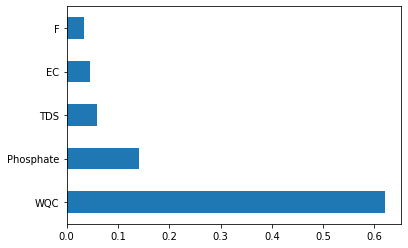

In [32]:
pd.Series(model.feature_importances_, index = X.columns).nlargest(5).plot(kind = 'barh')


In [33]:
rf = RandomForestRegressor()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [36]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [39]:
y_pred = rf_random.predict(X_test)

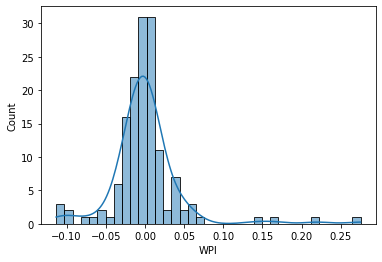

In [40]:
sns.histplot(y_test - y_pred,kde = True)

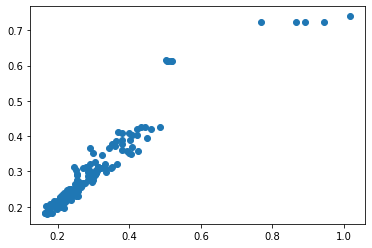

In [41]:
plt.scatter(y_test,y_pred)

In [42]:
param_grid = {
    'max_depth': [rf_random.best_params_['max_depth']],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf'], 
                         rf_random.best_params_['min_samples_leaf']+2],
    'min_samples_split': [rf_random.best_params_['min_samples_split'] - 2,
                          rf_random.best_params_['min_samples_split'] - 1,
                          rf_random.best_params_['min_samples_split'], 
                          rf_random.best_params_['min_samples_split'] +1,
                          rf_random.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_random.best_params_['n_estimators'] - 100, 
                     rf_random.best_params_['n_estimators'], 
                     rf_random.best_params_['n_estimators'] + 100]
}

print(param_grid)

{'max_depth': [20], 'max_features': ['auto'], 'min_samples_leaf': [1, 3], 'min_samples_split': [13, 14, 15, 16, 17], 'n_estimators': [600, 700, 800]}


In [43]:
rf=RandomForestRegressor()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [44]:
grid_search

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

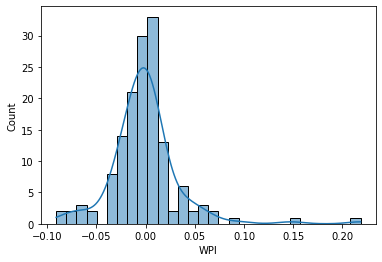

In [45]:
y_pred=grid_search.predict(X_test)
sns.histplot(y_test - y_pred, kde = True)

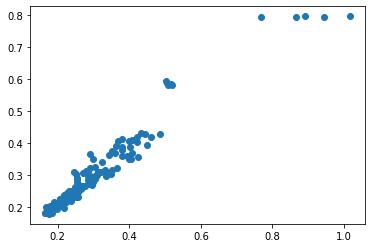

In [46]:
plt.scatter(y_test, y_pred)

In [47]:
params = {'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

In [48]:
params

{'max_depth': <hyperopt.pyll.base.Apply at 0x7f99c5410e90>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7f99c5410350>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f99c5410c10>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7f99c5410050>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7f99c54108d0>}

In [49]:
seed=2
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])
    model = RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    y_pred_hyperopt = model.predict(X_test)
    score = mean_squared_error(y_test,y_pred_hyperopt)
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=100,rstate=np.random.RandomState(seed))
    return best

trial=Trials()
best=optimize(trial)

100%|██████████| 100/100 [01:46<00:00,  1.06s/it, best loss: 0.0005770963233965665]


In [50]:
best

{'max_depth': 10.650314694599151,
 'min_samples_leaf': 2.139847542366849,
 'min_samples_split': 3.7238749224042267,
 'n_estimators': 280.7442743553137}

In [51]:
for t in trial.trials[:2]:
    print (t)

{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 0.000796293869032015, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [0], 'min_samples_leaf': [0], 'min_samples_split': [0], 'n_estimators': [0]}, 'vals': {'max_depth': [6.44924027262962], 'min_samples_leaf': [3.2557038491408083], 'min_samples_split': [3.705893814587132], 'n_estimators': [310.68170422696016]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2021, 7, 18, 11, 29, 51, 103000), 'refresh_time': datetime.datetime(2021, 7, 18, 11, 29, 51, 866000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 0.0007789134031086119, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'max_depth': [1], 'min_samples_leaf': [1], 'min_samples_split': [1], 'n_estimators': [1]}, 'vals': {'max_depth': [13.330641077198102], 'min_samples_leaf': [4.1346696482442695], 'min_sam

In [52]:
TID = [t['tid'] for t in trial.trials]
Loss = [t['result']['loss'] for t in trial.trials]
maxd = [t['misc']['vals']['max_depth'][0] for t in trial.trials]
nest = [t['misc']['vals']['n_estimators'][0] for t in trial.trials]
min_ss = [t['misc']['vals']['min_samples_split'][0] for t in trial.trials]
min_sl = [t['misc']['vals']['min_samples_leaf'][0] for t in trial.trials]

hyperopt_rfr = pd.DataFrame({'tid':TID,'loss':Loss,
                          'max_depth':maxd,'n_estimators':nest,
                          'min_samples_split':min_ss, 'min_samples_leaf':min_sl})

In [53]:
hyperopt_rfr.head()

,tid,loss,max_depth,n_estimators,min_samples_split,min_samples_leaf
0,0,0.000796,6.449240,310.681704,3.705894,3.255704
1,1,0.000779,13.330641,446.255378,3.348050,4.134670
2,2,0.001515,12.294777,441.121102,5.352586,1.369119
3,3,0.001791,11.468520,148.041302,2.798398,1.919946
4,4,0.000654,15.271833,266.679634,2.268145,2.775302


In [54]:
trainedforest = RandomForestRegressor(max_depth = best['max_depth'],  
                                       min_samples_leaf = round(best['min_samples_leaf']), 
                                       min_samples_split = round(best['min_samples_split']), 
                                       n_estimators = int(best['n_estimators'])).fit(X_train,y_train)

In [55]:
y_pred_hyperopt = trainedforest.predict(X_test)

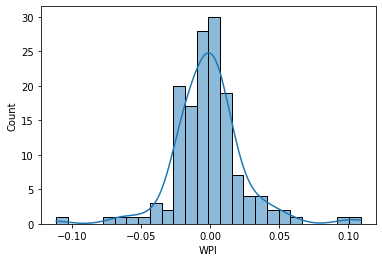

In [56]:
sns.histplot(y_test - y_pred_hyperopt,kde = True)

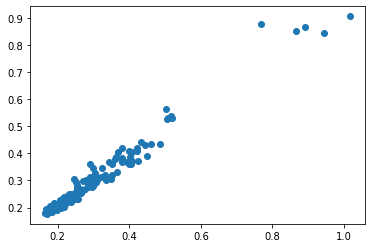

In [57]:
plt.scatter(y_test,y_pred_hyperopt)

In [58]:
print('MAE is:',mean_absolute_error(y_test,y_pred_hyperopt))
print('MSE is:',mean_squared_error(y_test,y_pred_hyperopt))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred_hyperopt)))

MAE is: 0.017216998634890405
MSE is: 0.0006515035908246407
RMSE is: 0.025524568376852932


In [59]:
import pickle
file = open('regression_rf.pkl','wb')
pickle.dump(trainedforest,file)